### 특이값과 특이벡터의 관계

행렬  𝐴 의 공분산행렬 $A^TA^{}$ 는

\begin{align}
A^TA^{} 
= (V^{} \Sigma^T U^T)( U^{}\Sigma^{} V^T) 
= V^{} \Lambda^{} V^T 
\end{align}

가 되어 행렬  𝐴 의 특이값의 제곱(과 0)이 공분산행렬  $A^TA^{}$ 의 고유값, 행렬  𝐴 의 오른쪽 특이벡터가 공분산행렬  $A^TA^{}$ 의 고유벡터가 된다.

In [1]:
import numpy as np

In [2]:
A = np.array([[3, -1], [1, 3], [1, 1]])
A

array([[ 3, -1],
       [ 1,  3],
       [ 1,  1]])

In [3]:
w, V = np.linalg.eig(A.T @ A)

In [7]:
# 공분산행렬  𝐴𝐴𝑇 의 고유값
w

array([12., 10.])

In [5]:
U, S, VT = np.linalg.svd(A)
S

array([3.46410162, 3.16227766])

In [6]:
# A의 특이값 제곱
S ** 2

array([12., 10.])

In [9]:
V

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [13]:
VT.T  # A의 오른쪽 특이벡터

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

### Practice 3
NumPy를 사용하여 행렬  𝐴 의 왼쪽 특이벡터가 공분산행렬  𝐴𝐴𝑇 의 고유벡터가 된다는 것을 보여라.

\begin{align}
A = 
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}
\end{align}

In [15]:
A = np.array([[3, -1], [1, 3], [1, 1]])
A

array([[ 3, -1],
       [ 1,  3],
       [ 1,  1]])

In [17]:
w, V = np.linalg.eig(A.T @ A)
w # ATA의 고유값

array([12., 10.])

In [18]:
U, S, VT = np.linalg.svd(A)

In [20]:
S ** 2 # 특이값 제곱

array([12., 10.])

In [21]:
V # ATA의 고유벡터

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [23]:
-VT.T # 오른쪽 특이벡터

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### 1차원 근사
2차원 평면 위에 3개의 2차원 벡터  𝑎1,𝑎2,𝑎3 가 있다. 원점을 지나면서 모든 점들과 가능한 한 가까이 있는 직선을 만들고 싶다면 직선의 방향을 어떻게 해야 할까? 직선의 방향을 나타내는 단위 벡터를  𝑤 라고 하자.

In [31]:
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

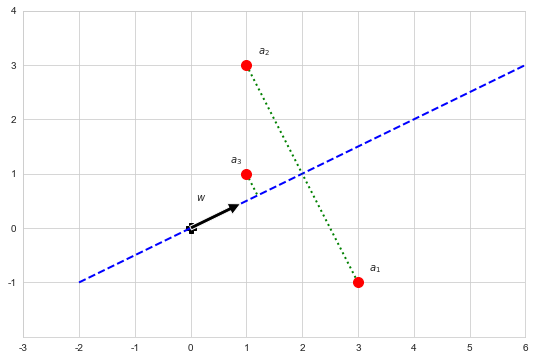

In [38]:
w = np.array([2, 1]) / np.sqrt(5)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])

black = {"facecolor": "black"}

plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 8], [-1, 4], 'b--', lw=2)
plt.plot([a1[0], 2], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 1], 'g:', lw=2)
plt.plot([a3[0], 1.2], [a3[1], 0.6], 'g:', lw=2)

plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)

plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")

plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()

벡터  𝑤 와 점  𝑎𝑖 의 거리의 제곱은 다음처럼 계산할 수 있다.
\begin{align}
\Vert a_i^{\perp w}\Vert^2 = \Vert a_i\Vert^2 - \Vert a_i^{\Vert w}\Vert^2 = \Vert a_i\Vert^2 - (a_i^Tw)^2
\end{align}
벡터  𝑎1,𝑎2,𝑎3 를 행벡터로 가지는 행렬  𝐴 를 가정하면
\begin{align}
A = \begin{bmatrix} a_1^T \\ a_2^T \\ a_3^T \end{bmatrix}
\end{align}

행벡터의 놈의 제곱의 합은 행렬의 놈이므로 모든 점들과의 거리의 제곱의 합은 행렬의 놈으로 계산된다.

\begin{aligned}
\sum_{i=1}^3 \Vert a_i^{\perp w}\Vert^2 
&= \sum_{i=1}^3 \Vert a_i\Vert^2 - \sum_{i=1}^3  (a_i^Tw)^2 \\
&= \Vert A \Vert^2 - \Vert Aw\Vert^2 \\
\end{aligned}

점  𝑎𝑖 의 위치가 고정되어 있으므로 행렬  𝐴 의 놈 값은 고정되어 있다. 따라서 이 값이 가장 작아지려면   $‖𝐴𝑤‖^2$ 의 값이 가장 크게 만드는  𝑤 를 찾아야 한다.이 문제는 다음과 같이 수식으로 쓸 수 있다.

\begin{align}
\arg\max_w \Vert Aw \Vert^2 
\end{align}

### 1차원 근사의 풀이

위에서 예로 든 행렬  𝐴∈𝐑3×2 를 특이분해하면 2개의 특이값, 왼쪽/오른쪽 특이벡터를 가진다. 이를 각각 다음처럼 이름붙인다.

+ 첫 번째 특잇값:  𝜎1 , 첫 번째 왼쪽 특이벡터  𝑢1∈𝐑3 , 첫 번째 오른쪽 특이벡터  𝑣1∈𝐑2 
+ 두 번째 특잇값:  𝜎2 , 두 번째 왼쪽 특이벡터  𝑢2∈𝐑3 , 두 번째 오른쪽 특이벡터  𝑣2∈𝐑2

첫 번째 특이값  𝜎1 은 두 번째 특이값  𝜎2 보다 같거나 크다.
\begin{align}
\sigma_1 \geq \sigma_2
\end{align}

또한 위에서 알아낸 것처럼 A에 오른쪽 특이벡터를 곱하면 왼쪽 특이벡터 방향이 된다.
\begin{align}
A v_1 = \sigma_1 u_1
\end{align}
\begin{align}
A v_2 = \sigma_2 u_2
\end{align}

오른쪽 특이벡터  𝑣1,𝑣2 는 서로 직교하므로 (같은 방향이 아니라서) 선형독립이고 2차원 평면공간의 기저벡터가 될 수 있다.

우리는  ‖𝐴𝑤‖ 의 값이 가장 크게 만드는  𝑤 를 찾아야 하는데  𝑤 는 2차원 벡터이므로 2차원 평면공간의 기저벡터인  𝑣1,𝑣2 의 선형조합으로 표현할 수 있다.

\begin{align}
w = w_{1} v_1 + w_{2} v_2
\end{align}

이때  ‖𝐴𝑤‖ 의 값은

\begin{aligned}
\Vert Aw\Vert^2 
&= \Vert A(w_{1} v_1 + w_{2} v_2)\Vert^2 \\
&= \Vert w_{1}Av_1 + w_{2}Av_2 \Vert^2 \\
&= \Vert w_{1} \sigma_1 u_1 + w_{2} \sigma_2 u_2 \Vert^2 \\
&= \Vert w_{1} \sigma_1 u_1 \Vert^2 + \Vert w_{2} \sigma_2 u_2 \Vert^2 \;\; \text{(orthogonal)} \\
&= w_{1}^2 \sigma_1^2 \Vert  u_1 \Vert^2 + w_{2}^2 \sigma_2^2 \Vert  u_2 \Vert^2 \\
&= w_{1}^2 \sigma_1^2 + w_{2}^2 \sigma_2^2  \;\; \text{(unit vector)}\\
\end{aligned}

$\sigma_1 > \sigma_2 > 0$이므로  $w_{1}^2 + w_{2}^2 = 1$ 라는 조건을 만족하면서 위 값을 가장 크게 하는  𝑤1,𝑤2 값은
\begin{align}
w_{1} = 1, w_{2} = 0
\end{align}

이다. 즉, 첫 번째 오른쪽 특이벡터 방향으로 하는 것이다.
$$w = v_1$$

이때  ‖𝐴𝑤‖ 는 첫 번째 특잇값이 된다.

$$\Vert Aw\Vert = \Vert Av_1\Vert = \Vert \sigma_1 u_1\Vert = \sigma_1 \Vert u_1\Vert = \sigma_1$$

위에서 예로 들었던 행렬

$$A = 
\begin{bmatrix}
3 & -1 \\
1 & 3 \\
1 & 1
\end{bmatrix}$$

첫 번째 오른쪽 특이벡터 
$$v_1 = 
\begin{bmatrix}
\frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} \\
\end{bmatrix}$$

가 가장 거리의 합이 작은 방향이 된다. 그리고 이때의 거리의 제곱의 합은 다음과 같다.

$$\Vert A \Vert^2 - \Vert Aw\Vert^2
=\Vert A \Vert^2 - \sigma_1^2$$

In [39]:
A

array([[ 3, -1],
       [ 1,  3],
       [ 1,  1]])

In [40]:
np.linalg.norm(A) ** 2 - S[0]**2  # ∥A∥2−σ1^2

9.999999999999998

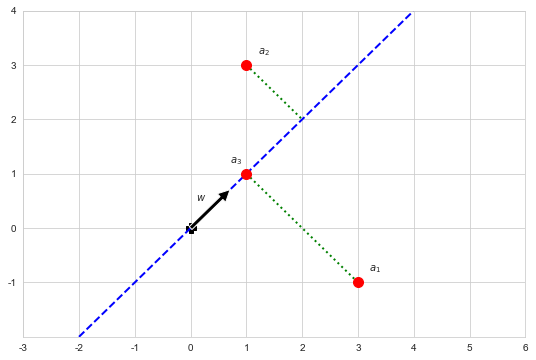

In [50]:
w = np.array([1, 1]) / np.sqrt(2)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])

black = {"facecolor": "black"}

plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 4], [-2, 4], 'b--', lw=2)
plt.plot([a1[0], 1], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 2], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()

### 일반적인 풀이

만약  𝑁=3 이 아니라 일반적인 경우에는 다음과 같이 풀 수 있다.

\begin{aligned}
\Vert Aw \Vert^2 
&= \sum_{i=1}^{N}  (a_i^Tw)^2 \\
&= \sum_{i=1}^{N}  (a_i^Tw)^T(a_i^Tw) \\
&= \sum_{i=1}^{N}  w^Ta_ia_i^Tw \\
&= w^T \left( \sum_{i=1}^{N}  a_ia_i^T \right) w \\
&= w^T A^TA w \\
\end{aligned}

공분산행렬의 고유분해 공식을 이용하면,

\begin{aligned}
w^T A^TA w 
&= w^T V \Lambda V^T w \\
&= w^T \left( \sum_{i=1}^{M}  \sigma^2_iv_iv_i^T \right) w \\
&= \sum_{i=1}^{M}\sigma^2_i(w^Tv_i)(v_i^Tw) \\
&= \sum_{i=1}^{M}\sigma^2_i\Vert v_i^Tw\Vert^2 \\
\end{aligned}

이 된다. 이 식에서  𝑀 은 0이 아닌 특이값 개수다.

즉, 우리가 풀어야 할 문제는 다음과 같다.

\begin{align}
\arg\max_w \Vert Aw \Vert^2 = \arg\max_w \sum_{i=1}^{M}\sigma^2_i\Vert v_i^Tw\Vert^2 
\end{align}

이 값을 가장 크게 하려면  𝑤 를 가장 큰 특이값에 대응하는 오른쪽 고유벡터  𝑣1 으로 해야 한다.

### 랭크-1 근사문제
또  𝑎𝑖 를  𝑤 에 투영한 벡터는

$$ a^{\Vert w}_i = (a_i^Tw)w$$

이므로  𝑤  벡터를 이용하면  𝑁 개의  𝑀 차원 벡터  $a_1, a_2, \cdots, a_N\;(a_i \in \mathbf{R}^M)$ 를 1차원으로 투영(projection)하여 가장 비슷한  𝑁 개의 1차원 벡터  $a^{\Vert w}_1, a^{\Vert w}_2, \cdots, a^{\Vert w}_N\;(a^{\Vert w}_i \in \mathbf{R}^1)$ 를 만들 수 있다.

$$A'=
\begin{bmatrix}
\left(a^{\Vert w}_1\right)^T \\
\left(a^{\Vert w}_2\right)^T \\
\vdots \\
\left(a^{\Vert w}_N\right)^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^Tw^{}w^T \\
a_2^Tw^{}w^T \\
\vdots \\
a_N^Tw^{}w^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^T \\
a_2^T \\
\vdots \\
a_N^T
\end{bmatrix}
w^{}w^T
=
Aw^{}w^T$$

이 답은 원래 행렬  𝐴 에 랭크-1 행렬  𝑤𝑤𝑇 를 곱해서 원래의 행렬  𝐴 와 가장 비슷한 행렬  𝐴′ 을 만드는 문제와 같다.

\begin{align}
\arg\min_w \Vert A - A' \Vert = \arg\min_w \Vert A^{} - A^{}w^{}w^T \Vert 
\end{align}

따라서 문제를 랭크-1 근사문제(rank-1 approximation problem)라고도 한다.

### 𝐾 차원 근사

이번에는  𝑁 개의  𝑀 차원 벡터  𝑎1,𝑎2,⋯,𝑎𝑁(𝑎𝑖∈𝐑𝑀) 를 1차원이 아니라 정규직교인 기저벡터  𝑤1,𝑤2,⋯,𝑤𝐾 로 이루어진  𝐾 차원 벡터공간으로 투영하여 가장 비슷한  𝑁 개의  𝐾 차원 벡터  𝑎‖𝑤1,𝑎‖𝑤2,⋯,𝑎‖𝑤𝑁 를 만들기 위한 정규직교 기저벡터  𝑤1,𝑤2,⋯,𝑤𝐾 를 찾는 문제를 생각하자. 이 문제는 랭크- 𝐾  근사문제라고 한다.

기저벡터행렬을  𝑊 라고 하자.

$$W = \begin{bmatrix} w_1 & w_2 & \cdots & w_K \end{bmatrix}$$

정규직교 기저벡터에 대한 벡터  𝑎𝑖 의 투영  𝑎‖𝑤𝑖 는 각 기저벡터에 대한 내적으로 만들 수 있다.
$$
\begin{aligned}
a^{\Vert w}_i 
&= 
(a_i^Tw_1)w_1 +
(a_i^Tw_2)w_2 +
\cdots
+ (a_i^Tw_K)w_K \\
\end{aligned}
=
\sum_{k=1}^K (a_i^Tw_k)w_k$$

벡터  𝑎1,𝑎2,⋯,𝑎𝑁 를 행벡터로 가지는 행렬  𝐴 를 가정하면

$$A = \begin{bmatrix} a_1^T \\ a_2^T \\ \vdots \\ a_N^T \end{bmatrix}$$

모든 점들과의 거리의 제곱의 합은 다음과 같이 행렬의 놈으로 계산할 수 있다.

\begin{aligned}
\sum_{i=1}^N \Vert a_i^{\perp w}\Vert^2 
&= \sum_{i=1}^N \Vert a_i\Vert^2 - \sum_{i=1}^N \Vert a^{\Vert w}_i\Vert^2 \\
&= \Vert A \Vert^2 - \sum_{i=1}^N \Vert a^{\Vert w}_i\Vert^2 \\
\end{aligned}

행렬  𝐴 는 이미 주어져 있으므로 이 값을 가장 작게 하려면 두 번째 항의 값을 가장 크게 하면 된다. 두 번째 항은 K=1일 때와 같은 방법으로 공분산행렬 형태로 바꿀 수 있다.

\begin{aligned}
\sum_{i=1}^N \Vert a^{\Vert w}_i\Vert^2 
&= \sum_{i=1}^N \sum_{k=1}^K \Vert (a_i^Tw_k)w_k \Vert^2 \\
&= \sum_{i=1}^N \sum_{k=1}^K \Vert a_i^Tw_k \Vert^2 \\
&= \sum_{k=1}^K w_k^T A^TA w_k \\
\end{aligned}

공분산행렬의 고유분해를 사용하면

\begin{aligned}
\sum_{k=1}^K w_k^T A^TA w_k 
&= \sum_{k=1}^K w_k^T V \Lambda V^T w_k \\
&= \sum_{k=1}^K w_k^T \left( \sum_{i=1}^{M}  \sigma^2_iv_iv_i^T \right) w_k \\
&= \sum_{k=1}^K \sum_{i=1}^{M}\sigma^2_i\Vert v_i^Tw_k\Vert^2 \\
\end{aligned}

이 문제도 1차원 근사문제처럼 풀면 다음과 같은 답을 얻을 수 있다.

[정리] 가장 큰  𝐾 개의 특이값에 대응하는 오른쪽 특이벡터가 기저벡터일 때 가장 값이 커진다.

### 랭크-K 근사문제

우리가 찾아야 하는 것은 이 값을 가장 크게 하는 𝐾개의 영벡터가 아닌 직교하는 단위벡터 𝑤𝑘이다. 고유분해의 성질로부터 오른쪽 기저벡터 중 가장 큰 𝐾개의 특잇값에 대응하는 오른쪽 특이벡터가 우리가 찾는 기저벡터가 된다.

이 문제는 다음처럼 랭크-𝐾 근사문제의 형태로 만들 수도 있다.

\begin{aligned}
a^{\Vert w}_i 
&= 
(a_i^Tw_1)w_1 +
(a_i^Tw_2)w_2 +
\cdots
+ (a_i^Tw_K)w_K \\
&=
\begin{bmatrix} w_1 & w_2 & \cdots & w_K \end{bmatrix}
\begin{bmatrix} a_i^Tw_1 \\ a_i^Tw_2 \\ \vdots \\ a_i^Tw_K \end{bmatrix} \\
&=
\begin{bmatrix} w_1 & w_2 & \cdots & w_K \end{bmatrix}
\begin{bmatrix} w_1^T \\ w_2^T \\ \vdots \\ w_K^T \end{bmatrix} a_i \\
&=
WW^Ta_i
\end{aligned}

이러한 투영벡터를 모아놓은 행렬  𝐴′ 는
$$
A'=
\begin{bmatrix}
\left(a^{\Vert w}_1\right)^T \\
\left(a^{\Vert w}_2\right)^T \\
\vdots \\
\left(a^{\Vert w}_N\right)^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^TW^{}W^T \\
a_2^TW^{}W^T\\
\vdots \\
a_N^TW^{}W^T
\end{bmatrix}
=
\begin{bmatrix}
a_1^T \\
a_2^T \\
\vdots \\
a_N^T
\end{bmatrix}
W^{}W^T
=
AW^{}W^T
$$

따라서 이 문제는 원래 행렬  𝐴 에 랭크-K 행렬  𝑊𝑊𝑇 를 곱해서 원래의 행렬  𝐴 와 가장 비슷한 행렬  𝐴′ 을 만드는 문제와 같다.

\begin{align}
\arg\min_{w_1,\cdots,w_K} \Vert A - AW^{}W^T \Vert 
\end{align}